BLOK 1 -> Load the required packages

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, concatenate 
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model, Model

BLOK 2 -> Define a global variables

In [2]:
activation = 'tanh'
optimizer = 'SGD'
batch_size = 16
epochs = 40

BLOK 3 -> Define a path

In [3]:
path = 'PATH-TO-SVMDAT-FOLDER'

BLOK 4 -> Data preprocessing functions

In [4]:
def loadFileNames(filePath, prefix):
    files = []
    for r, d, f in os.walk(filePath):
        for file in f:
            data = '.' + prefix
            if data in file:
                files.append(os.path.join(r, file))
    return files          

def load_file(filepath):
    dataframe = pd.read_csv(filepath, header = None, delim_whitespace = True)
    return dataframe

def frameFunc(filepath):
    dataframe = load_file(filepath)
    df_list, df_list2, df_list3, df_list4, df_list5, df_list6, df_list7, df_list8, df_list9, df_list10, df_list11, df_list12 = [], [], [], [], [], [], [], [], [], [], [], []
    for index in dataframe.index:
        odparsovat = dataframe.iloc[index]
        label = odparsovat.iloc[0]    
        pracovne = odparsovat.drop(0)    
        result, result2, result3, result4, result5 = [], [], [], [], []
        for items in pracovne.iteritems():
            result.append(items[1])        
        for i in result:
            i = str(i)
            result2.append(i[i.find(":")+1:])  
        result3 = result2[:result2.index("#")]
        result4 = result2[result2.index("#")+1:]
        result4.remove("#")
        for i in result3:
            i = float(i)
            result5.append(i)
        leto = np.array(result5)
        leto.resize(20,4)    
        df_list.append(leto)
        df_list2.append(label)
        df_list3.append(float(result4[0]))
        df_list4.append(float(result4[1]))
        df_list5.append(float(result4[2]))
        df_list6.append(result4[3])
        df_list7.append(float(result4[4]))
        df_list8.append(float(result4[5]))
        df_list9.append(result4[6])
        df_list10.append(result4[7])
        df_list11.append(result4[8])
        df_list12.append(filepath[filepath.rindex("/")+1:filepath.index(".")])
    zippedList =  list(zip(df_list, df_list2, df_list3, df_list4, df_list5, df_list6, df_list7, df_list8, df_list9, df_list10, df_list11, df_list12))
    dfObj = pd.DataFrame(zippedList, columns = ['x','y', 'longitude1', 'latitude1', 'neviem1', 'neviem2', 'longitude2', 'latitude2', 'id', 'magnitude', 'distance', 'name'])
    return dfObj

def createFrame(prefix):
    frame = pd.DataFrame(columns = ['x','y']) 
    for i in loadFileNames(path, prefix):
        frame = frame.append(frameFunc(i))
    return frame

BLOK 5 -> Data preprocessing techniques (Oversampling, Noise)

In [ ]:
# OVERSAMPLING
#from imblearn.over_sampling import RandomOverSampler
#def oversampling_technique(X_train, y_train):
#    oversample = RandomOverSampler(sampling_strategy = 'minority')
#    X_train, y_train = oversample.fit_resample(X_train, y_train)
#    return X_train, y_train

# =======================================================================================

# NOISE
#X_train_for_noise1 = pd.DataFrame()
#for i, value in enumerate(y_train['y']):
#    if value  == 1:
#        X_train_for_noise1 = X_train_for_noise1.append(X_train.iloc[i])
        
#X_train_for_noise2 = pd.DataFrame()
#for i, value in enumerate(y_train['y']):
#    if value  == 1:
#       X_train_for_noise2 = X_train_for_noise2.append(X_train.iloc[i])
        
#add noise1  
#mu, sigma = 0, 0.03 
#noise1 = np.random.normal(mu, sigma, [5916,1]) 
#X_train_for_noise1 = X_train_for_noise1 + noise1
#X_train = X_train.append(X_train_for_noise1)    
#add noise2  
#mu, sigma = 0, 0.06
#noise2 = np.random.normal(mu, sigma, [5916,1]) 
#X_train_for_noise2 = X_train_for_noise2 + noise2
#X_train = X_train.append(X_train_for_noise2) 

#newDF = y_train[:12000]  
#newDF = newDF.replace(0, 1)
#y_train = y_train.append(newDF)

BLOK 6 -> Call the data preprocessing function

In [5]:
parsed_data = createFrame('eq').append(createFrame('ex'))
parsed_data.head()

,distance,id,latitude1,latitude2,longitude1,longitude2,magnitude,name,neviem1,neviem2,x,y
0,186,2007038074849,20.662,20.662,67.171,67.171,1.7LHEL,HEF,24.044622,1,"[[0.8287, 0.677941, 2.508552, 0.997529], [1.52...",1
1,171,2007040143345,19.768,19.768,67.908,67.908,1.5LHEL,HEF,13.726952,1,"[[0.724799, 0.909992, 1.650036, 0.510897], [0....",1
2,42,2007051193600,22.832,22.832,68.622,68.622,1.2LHEL,HEF,1494.869588,1,"[[0.225538, 0.860364, 1.145335, 4.299855], [0....",1
3,93,2007052094026,24.450,24.450,67.612,67.612,1.8LHEL,HEF,7986.234599,1,"[[0.35717, 0.18351, 5.05147, 1.617906], [0.503...",1
4,193,2007055073836,20.567,20.567,67.125,67.125,1.9LHEL,HEF,9.505574,1,"[[0.682042, 0.819502, 3.540873, 1.044672], [1....",1


BLOK 7 -> Divide data into train and test

In [6]:
orig = pd.DataFrame(parsed_data)[['id','name','distance','latitude1','longitude1','x','y']]
orig = orig.rename(columns={"id": "qid", "name": "station", "distance":"dist", "latitude1":"lat", "longitude1":"long", "x":"x", "y":"y"})
orig['y'].replace(-1, 0, inplace = True)
orig['dist'] = pd.to_numeric(orig['dist'],downcast = 'float')    
orig.info()

print()
print(orig.head())

uniqueIDs = orig['qid'].unique()
trainID, testID = train_test_split(uniqueIDs, test_size = 0.2, random_state = 42)
train = orig[orig['qid'].isin(trainID)]
test = orig[orig['qid'].isin(testID)]

print("Train shape: ", train.shape, " Test shape: ", test.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33362 entries, 0 to 1633
Data columns (total 7 columns):
qid        33362 non-null object
station    33362 non-null object
dist       33362 non-null float32
lat        33362 non-null float64
long       33362 non-null float64
x          33362 non-null object
y          33362 non-null int64
dtypes: float32(1), float64(2), int64(1), object(3)
memory usage: 1.9+ MB

             qid station   dist     lat    long  \
0  2007038074849     HEF  186.0  20.662  67.171   
1  2007040143345     HEF  171.0  19.768  67.908   
2  2007051193600     HEF   42.0  22.832  68.622   
3  2007052094026     HEF   93.0  24.450  67.612   
4  2007055073836     HEF  193.0  20.567  67.125   

                                                   x  y  
0  [[0.8287, 0.677941, 2.508552, 0.997529], [1.52...  1  
1  [[0.724799, 0.909992, 1.650036, 0.510897], [0....  1  
2  [[0.225538, 0.860364, 1.145335, 4.299855], [0....  1  
3  [[0.35717, 0.18351, 5.05147, 1.617906], [0.

BLOK 8 -> Functions for initialize CNN models -> Output: model

In [ ]:
#def basicModel():
#    model = Sequential()
#    model.add(Conv2D(64, (4, 4), padding='same', input_shape = (20, 4, 1), activation = 'relu'))
#    model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
#    model.add(Conv2D(64, (4, 4), padding='same', activation = 'relu'))
#    model.add(MaxPooling2D(pool_size = (2, 2), padding='same'))
#    model.add(Flatten())
#    model.add(Dropout(0.2))
#    model.add(Dense(output_dim = 128, activation = 'relu'))
#    model.add(Dense(output_dim = 64, activation = 'relu'))
#    model.add(Dense(output_dim = 1, activation = 'sigmoid'))
#    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#    
#    return model

# =======================================================================================

#def modelWithOversampling():
#    model = Sequential()
#    model.add(Conv2D(128, (4, 4), padding='same', input_shape = (20, 4, 1), activation = 'relu'))
#    model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
#    model.add(Conv2D(128, (2, 2), padding='same', activation = 'relu'))
#    model.add(MaxPooling2D(pool_size = (2, 2), padding='same'))
#    model.add(Flatten())
#    model.add(Dropout(0.2))
#    model.add(Dense(output_dim = 128, activation = 'relu'))
#    model.add(Dense(output_dim = 64, activation = 'relu'))
#    model.add(Dense(output_dim = 1, activation = 'sigmoid'))
#    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#    
#    return model

# =======================================================================================

#def modelABC():
#    inputs = Input(shape=(20,4,1))
#    a = Flatten()(inputs)
#    a = Dense(output_dim = 128, activation = 'relu')(a)
#    a = Dense(output_dim = 64, activation = 'relu')(a)
#    a = Dense(output_dim = 32, activation = 'relu')(a)
#    a = Dense(output_dim = 64, activation = 'relu')(a)
#    a = Dense(output_dim = 128, activation = 'relu')(a)
#    a = Dense(output_dim = 256, activation = 'relu')(a)
#    b = Conv2D(64, kernel_size = (4,4), padding='same', activation = 'relu')(inputs)
#    b = MaxPooling2D(pool_size = (2, 2), padding = 'same')(b)
#    b = Flatten()(b)
#    c = Flatten()(inputs)
#    c = Dense(output_dim = 128, activation = 'relu')(c)
#    c = Dense(output_dim = 64, activation = 'relu')(c)
#    c = Dense(output_dim = 32, activation = 'relu')(c)
#    c = Dense(output_dim = 64, activation = 'relu')(c)
#    c = Dense(output_dim = 128, activation = 'relu')(c)
#    c = Dense(output_dim = 256, activation = 'relu')(c)
#    x = concatenate([a, b, c])
#    x = Dropout(0.2)(x)
#    x = Dense(output_dim = 64, activation = 'relu')(x)
#    output = Dense(units = 1, activation='sigmoid')(x)
#    model = Model(inputs=inputs, outputs=output)
#    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#   
#    return model

BLOK 9 -> Function for initialize CNN model -> Output: model

In [7]:
def initializeModel():
    inputs = Input(shape=(20,4,1))
    a = Flatten()(inputs)
    a = Dense(128, activation = activation)(a)
    a = Dense(64, activation = activation)(a)
    a = Dense(32, activation = activation)(a)
    a = Dense(64, activation = activation)(a)
    a = Dense(128, activation = activation)(a)
    a = Dense(256, activation = activation)(a)
    
    b = Conv2D(64, kernel_size = (4,4), padding='same', activation = activation)(inputs)
    b = MaxPooling2D(pool_size = (2, 2), padding = 'same')(b)
    b = Flatten()(b)
    
    c = Flatten()(inputs)
    c = Dense(128, activation = activation)(c)
    c = Dense(64, activation = activation)(c)
    c = Dense(32, activation = activation)(c)
    c = Dense(64, activation = activation)(c)
    c = Dense(128, activation = activation)(c)
    c = Dense(256, activation = activation)(c)
    
    x = concatenate([a, b, c])
    x = Dropout(0.2)(x)
    x = Dense(64, activation = activation)(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

BLOK 10 -> MAIN FUNCTION

In [8]:
X_train = np.expand_dims(np.stack(train['x']), axis = 3)
y_train = np.stack(train['y'])
X_test = np.expand_dims(np.stack(test['x']), axis = 3)
y_test = np.stack(test['y'])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print()

# =============================================================================
#   Train model
# =============================================================================
model = initializeModel()
saved_model = "name.hdf5"
checkpoint = ModelCheckpoint(saved_model, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
class_weight = {1: 6, 0: 2}
model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = batch_size, epochs = epochs, verbose=1, callbacks = [checkpoint], class_weight=class_weight)
# LOAD BEST MODEL
#model=load_model('model-poGride1.4')

# =============================================================================
#   Predict and evalute test set
# =============================================================================
score = model.evaluate(X_test, y_test, verbose = 2)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

test_results = pd.DataFrame(test).copy()
test_results['y_pred'] = model.predict(X_test)
test_results['y_pred'] = test_results['y_pred'].apply(lambda x: 1 if x > 0.5 else 0)
test_results['correct_class'] = np.where(test_results['y'] == test_results['y_pred'], 1, 0)

simple_voting = pd.pivot_table(test_results, index = ['qid'], values=['y_pred', 'y'], aggfunc = {'y_pred': [lambda x: np.sum(x)/len(x),len,np.sum], 'y':np.mean})
simple_voting.columns = ['y','y_pred_ratio','y_pred_len','y_pred_sum']
simple_voting['y_pred'] = simple_voting['y_pred_ratio'].apply(lambda x: 1 if x >= 0.5 else 0)

print(classification_report(simple_voting['y'], simple_voting['y_pred']))
cm = confusion_matrix(simple_voting['y'], simple_voting['y_pred'])
print(cm)
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
FNR = FN / (FN + TP)
FPR = FP / (FP + TN)
print("miss rate:", FNR)
print("fall-out:", FPR)

(26786, 20, 4, 1)
(26786,)
(6576, 20, 4, 1)
(6576,)

6576/6576 - 7s - loss: 0.2108 - accuracy: 0.9270
Test Score: 0.21079024459051826
Test Accuracy: 0.9270073
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1300
           1       0.92      0.93      0.93       427

    accuracy                           0.96      1727
   macro avg       0.95      0.95      0.95      1727
weighted avg       0.96      0.96      0.96      1727

[[1265   35]
 [  28  399]]
miss rate: 0.06557377049180328
fall-out: 0.026923076923076925


BLOK 11 -> VISUALIZATIONS

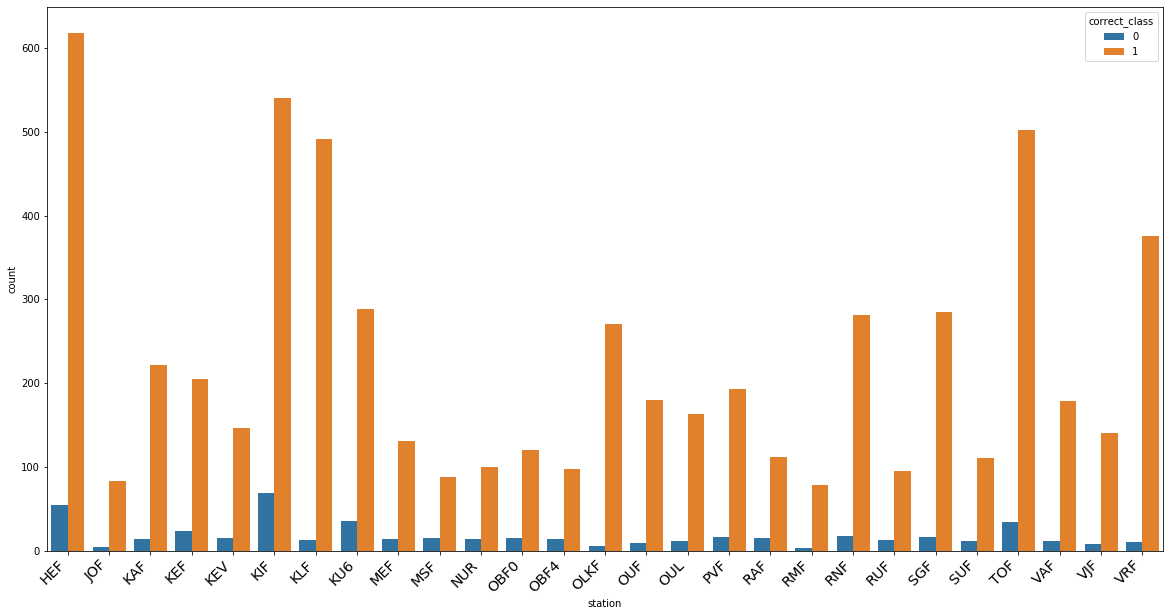

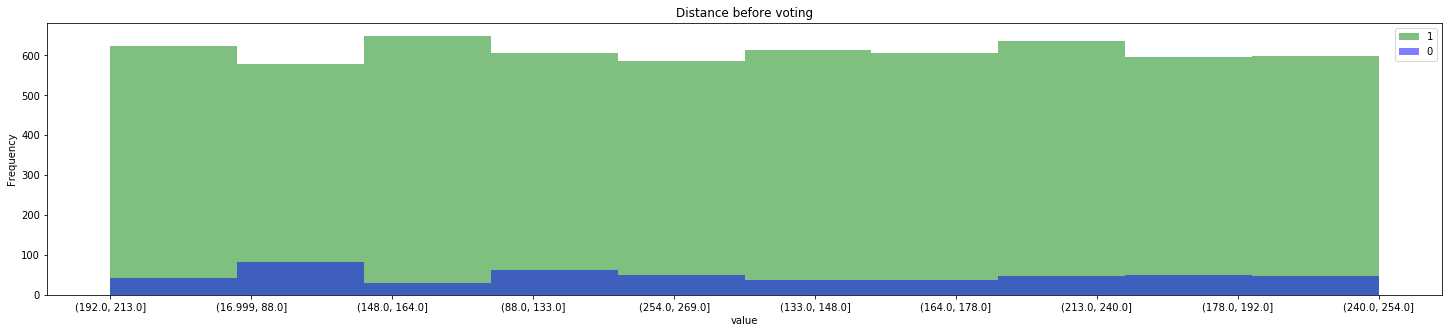

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(x='station',hue='correct_class', data=test_results)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')

station_test_results = pd.pivot_table(test_results, index=['station'],values=['correct_class'],aggfunc = {'correct_class':[lambda x: len(x)-sum(x), sum]})
station_test_results.columns = ['wrong','correct']
station_test_results['correct_perc']=station_test_results['correct']/(station_test_results['wrong']+station_test_results['correct'])
station_test_results['wrong_perc']=station_test_results['wrong']/(station_test_results['wrong']+station_test_results['correct'])

table_of_count_correct_class_per_qid = pd.pivot_table(test_results, 
                            index = ['qid'], 
                            values=['correct_class'], 
                            aggfunc = {'correct_class': [lambda x: len(x)-sum(x), sum]})
table_of_count_correct_class_per_qid.columns = ['wrong', 'correct']


gk = pd.DataFrame(table_of_count_correct_class_per_qid).copy()
gk["total"] = gk["wrong"] + gk["correct"]
g2 = gk.sort_values(["correct","wrong"],ascending=False).groupby( ["total", gk.index.values,"wrong", "correct"] ).count().reset_index()

data_histogram2 = test_results
data_histogram2["dist"] = pd.to_numeric(data_histogram2["dist"])
data_histogram2["dist"] = pd.qcut(data_histogram2['dist'], q=10).astype(str)

x1_histogram2 = data_histogram2.loc[data_histogram2.correct_class == 1, 'dist']
x2_histogram2 = data_histogram2.loc[data_histogram2.correct_class == 0, 'dist']
kwargs = dict(alpha=0.5, bins=10)
plt.figure(figsize=(25,5))
plt.hist(x1_histogram2, **kwargs, color='g', label= '1')
plt.hist(x2_histogram2, **kwargs, color='b', label='0')
plt.gca().set(title='Distance before voting', ylabel='Frequency', xlabel='value')
plt.legend();